In [13]:
import os
from PIL import Image
import numpy as np

np.set_printoptions(edgeitems=10)
# import sys
# sys.path.append('semantic-segmentation-2')

from utils import helpers

In [2]:
net, img_transforms, args = helpers.setup_net('../models/kitti_best.pth')

Using regular batch norm
Net built.
Net restored.


In [ ]:
net, img_transforms, args = helpers.setup_net('gen_models/best_epoch_1_mean-iu_0.73394.pth')

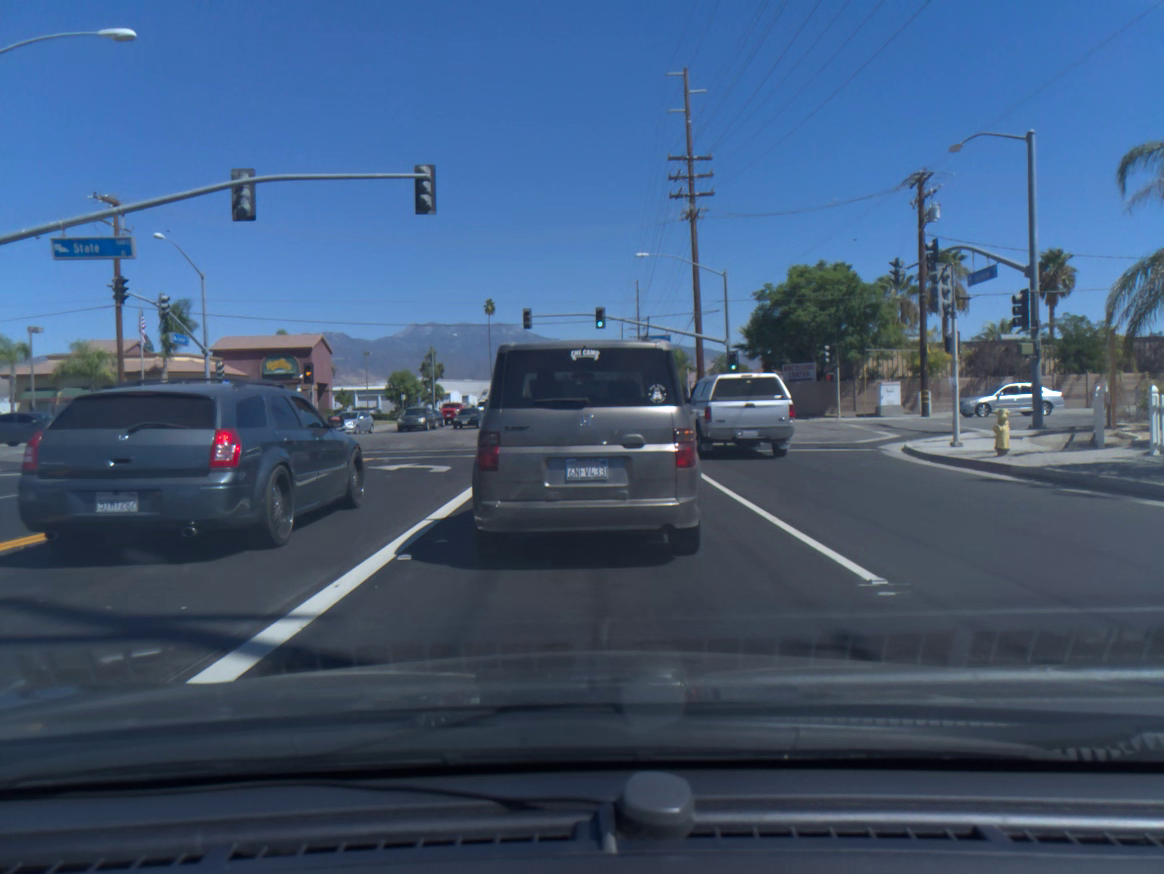

In [3]:
img_dir = 'comma10k/imgs'
segz_dir = 'comma10k/segz'
ims = os.listdir(img_dir)
x = Image.open(os.path.join(img_dir, ims[2]))
x_np = np.array(x)
x

In [4]:
p_color, p = helpers.predict_image(net, img_transforms, args, x_np)

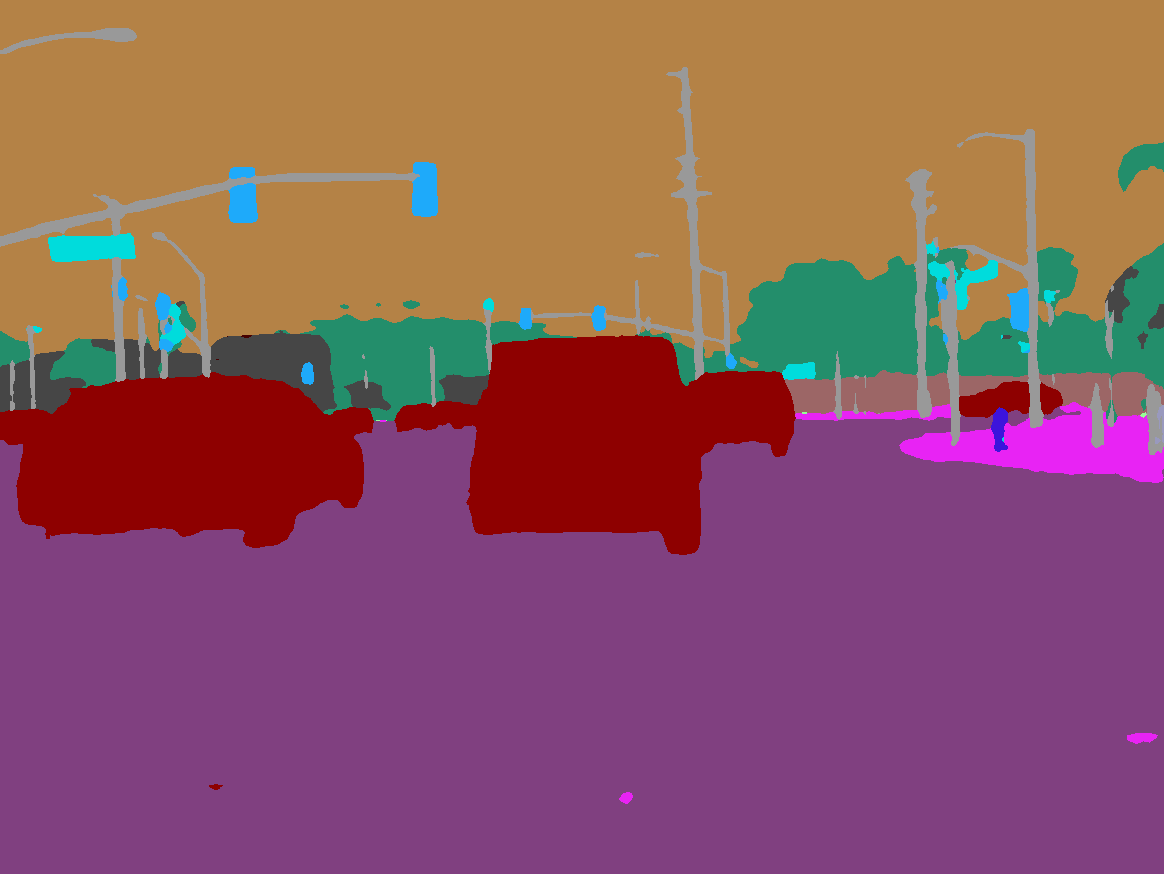

In [5]:
# Image segmentation prediction
p_pred = Image.fromarray(p_color)
p_pred

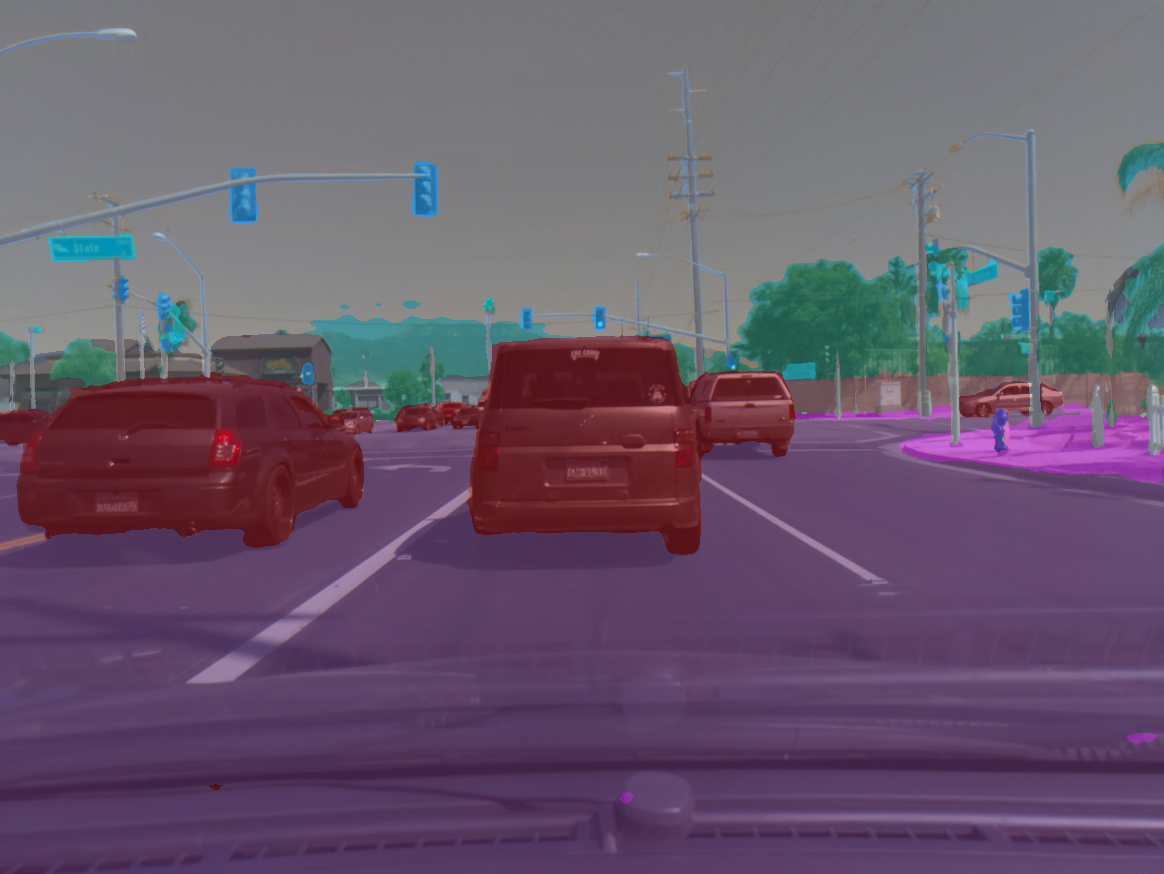

In [6]:
# Image segmentation over subject image
p_masked = Image.fromarray(x_np + p_color)
p_masked

background = Image.fromarray(x_np)
foreground = Image.fromarray(p_color)
foreground.putalpha(128)
background.paste(foreground, (0, 0), foreground)
background

In [15]:
# The predicted classes for individual pixels,specifically for the edges
print(p)

[[10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 ...
 [ 0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0 

In [ ]:
# Show all existing classes in given image
uniq_labels = set(p.flatten())
print("All unique labels in given image: {}".format(uniq_labels))

In [ ]:
np.argmax(np.unique(p[:, :15], return_counts=True))

In [ ]:
p[0, -1]

In [ ]:
s = np.load(os.path.join(segz_dir, ims[0] + '.npz'))
s = s['arr_0']
s

In [ ]:
!rm kitti_tile300_cv2_train_hardnm0.json

In [ ]:
!rm -rf logs

In [ ]:
!sh "scripts/train_commakitti_WideResNet38.sh"

In [ ]:
im = Image.open("images/000000_10_normal.png")

In [ ]:
p = helpers.predict_image(net, img_transforms, args, x_np)
p_masked = Image.fromarray(x_np + p)
p_masked

In [ ]:
im_np = np.array(im)

In [ ]:
im

In [ ]:
im_np.shape

In [ ]:
im2 = Image.open("images/000000_10_rgb.png")

In [ ]:
im_np2 = np.array(im2)

In [ ]:
im2

In [ ]:
im_np2.shape

In [ ]:
im_np